# 使用KNN进行回归预测

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## 数据勘查

In [7]:
# 读取鸢尾花数据集
# header参数指定标题的行，默认为0，如果没有标题则使用None
data = pd.read_csv(r'../Datasets/iris.csv', header=0)

data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
65,66,6.7,3.1,4.4,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
102,103,7.1,3.0,5.9,2.1,Iris-virginica
25,26,5.0,3.0,1.6,0.2,Iris-setosa


In [8]:
# 删除不需要的列：Id, Species
data.drop(['Id','Species'], axis=1, inplace=True)

In [9]:
# 检验数据集中是否有重复记录
data.duplicated().any()

True

In [10]:
# 删除数据集中的重复记录
data.drop_duplicates(inplace=True)

In [12]:
# 数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
dtypes: float64(4)
memory usage: 5.7 KB


## 算法实现

In [11]:
# 使用KNN进行回归预测
# 根据鸢尾花前3个特征的值，寻找最近的k个邻居
# 然后对k个邻居的第4个特征属性求均值，预测当前样本的第4个特征值
class KNN:
    # 初始化方法
    # 超参数k: 近邻个数
    def __init__(self, k):
        self.k = k
        
    # 训练方法
    def fit(self, X, y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    # 预测方法
    def predict(self, X):
        X = np.asarray(X)
        result = []
        
        # 对ndarray进行遍历，每次取数组中的一行进行运算（数组之间对位运算）
        for x in X:
            # 对于数据集中的每一个样本，依次与所有样本求欧氏距离
            dis = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
            
            # 返回数组排序后，每个元素在原数组（排序之前的数组）中的索引
            index = dis.argsort()
            
            # 进行截断，只取前k个元素，取距离最近的k个元素的索引
            index = index[:self.k]
            
            # 计算均值，加入到返回的结果中
            result.append(np.mean(self.y[index]))
            
            # 增加权重
            # 求所有邻居节点距离的倒数之和
            # 分母加上一个很小的值，避免除数为0
            #s = np.sum(1 / (dis[index] + 0.001))
            
            # 计算权重，用当前节点的距离的倒数之和除以所有节点的距离的倒数之和
            #weight = (1 / (dis[index] + 0.001)) / s
            
            # 使用邻近节点的标签值，乘以对应的权重，得到预测值
            #result.append(np.sum(self.y[index] * weight))
        
        return np.asarray(result)

In [13]:
# 对数据随机排序
d = data.sample(len(data), random_state=0)

# 构建训练集
train_X = d.iloc[:120, :-1]
train_y = d.iloc[:120, -1]

# 构建测试集
test_X = d.iloc[120:, :-1]
test_y = d.iloc[120:, -1]

In [14]:
# 创建KNN对象
knn = KNN(k=3)

# 训练
knn.fit(train_X, train_y)

# 预测
result = knn.predict(test_X)

print('预测值：')
display(result)

print('真实值：')
display(test_y.values)

print('预测值与真实值的误差均值：')
display(np.mean(np.sum((result - test_y) ** 2)))

预测值：


array([1.33333333, 2.        , 1.2       , 1.26666667, 1.93333333,
       1.16666667, 2.16666667, 0.36666667, 1.9       , 1.4       ,
       1.2       , 0.16666667, 1.93333333, 2.26666667, 1.73333333,
       0.13333333, 1.03333333, 1.3       , 1.83333333, 1.23333333,
       0.16666667, 0.23333333, 0.16666667, 2.03333333, 1.2       ,
       1.8       , 0.2       ])

真实值：


array([1.5, 1.8, 1. , 1.3, 2.1, 1.2, 2.2, 0.2, 2.3, 1.3, 1. , 0.2, 1.6,
       2.1, 2.3, 0.3, 1. , 1.2, 1.5, 1.3, 0.2, 0.4, 0.1, 2.1, 1.1, 1.5,
       0.2])

预测值与真实值的误差均值：


1.1299999999999997

## 数据可视化

In [16]:
# 设置matplotlib支持中文
mpl.rcParams['font.family'] = 'SimHei'

# 设置在使用中文字体时，能够正常显示负号(-)
mpl.rcParams['axes.unicode_minus'] = False

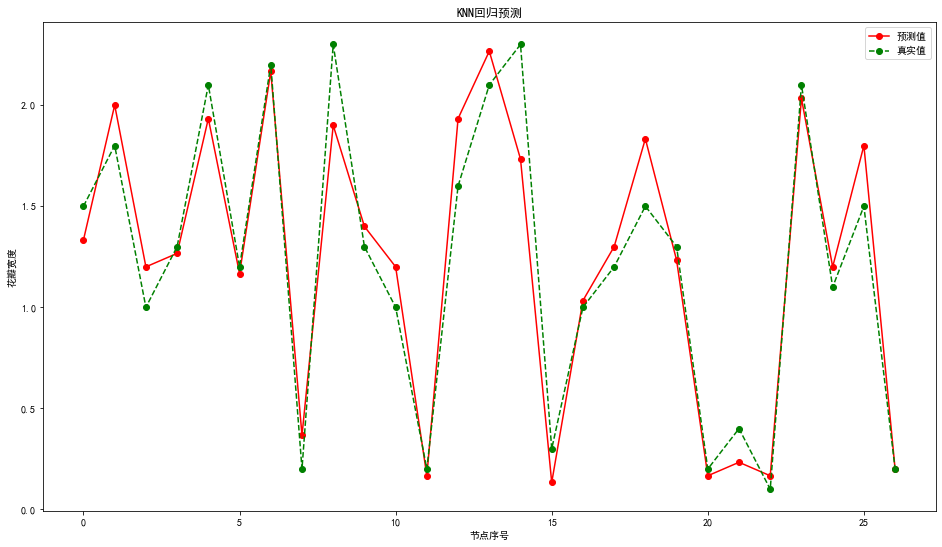

In [17]:
# 设置图表大小
plt.figure(figsize=(16, 9))

# 绘制预测值
plt.plot(result, 'ro-', label='预测值')

# 绘制真实值
plt.plot(test_y.values, 'go--', label='真实值')

# 渲染图表
plt.title('KNN回归预测')
plt.xlabel('节点序号')
plt.ylabel('花瓣宽度')
plt.legend(loc='best')
plt.show()